### H1N1 Vaccine Prediction

### import libraries

In [1]:
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [4]:
 !pip3 install xgboost

In [5]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [10]:
df = df.fillna(df.mean())
df = round(df)
df=df.fillna('No Category')

In [11]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [12]:
print("h1n1_worry")
print(df.h1n1_worry.unique())

print("h1n1_awareness")
print(df.h1n1_awareness.unique())

print("antiviral_medication")
print(df.antiviral_medication.unique())

print("contact_avoidance")
print(df.contact_avoidance.unique())

print("bought_face_mask")
print(df.bought_face_mask.unique())

print("wash_hands_frequently")
print(df.wash_hands_frequently.unique())

print("avoid_large_gatherings")
print(df.avoid_large_gatherings.unique())

print("reduced_outside_home_cont")
print(df.reduced_outside_home_cont.unique())

print("avoid_touch_face")
print(df.avoid_touch_face.unique())

print("dr_recc_h1n1_vacc")
print(df.dr_recc_h1n1_vacc.unique())

print("dr_recc_seasonal_vacc")
print(df.dr_recc_seasonal_vacc.unique())

print("chronic_medic_condition")
print(df.chronic_medic_condition.unique())

print("cont_child_undr_6_mnths")
print(df.cont_child_undr_6_mnths.unique())

print("is_health_worker")
print(df.is_health_worker.unique())

print("has_health_insur")
print(df.has_health_insur.unique())

print("is_h1n1_vacc_effective")
print(df.is_h1n1_vacc_effective.unique())

print("is_h1n1_vacc_effective")
print(df.is_h1n1_vacc_effective.unique())

print("sick_from_h1n1_vacc")
print(df.sick_from_h1n1_vacc.unique())

print("is_seas_vacc_effective")
print(df.is_seas_vacc_effective.unique())

print("is_seas_risky")
print(df.is_seas_risky.unique())

print("sick_from_seas_vacc")
print(df.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [13]:
print("age_bracket")
print(df.age_bracket.unique())

print("qualification")
print(df.qualification.unique())

print("race")
print(df.race.unique())

print("income_level")
print(df.income_level.unique())

print("marital_status")
print(df.marital_status.unique())

print("housing_status")
print(df.housing_status.unique())

print("employment")
print(df.employment.unique())

print("census_msa")
print(df.census_msa.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [14]:
enc = LabelEncoder()

In [15]:
df.age_bracket = enc.fit_transform(df.age_bracket)
df.qualification = enc.fit_transform(df.qualification)
df.race = enc.fit_transform(df.race)
df.sex = enc.fit_transform(df.sex)
df.income_level = enc.fit_transform(df.income_level)
df.marital_status = enc.fit_transform(df.marital_status)
df.housing_status = enc.fit_transform(df.housing_status)
df.employment = enc.fit_transform(df.employment)
df.census_msa = enc.fit_transform(df.census_msa)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [17]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

   race  sex  income_level  marital_status  housing_status  employment  \
0     3    0             2               2               1           2   
1     3    1             2               2               2           0   
2     3    1             0               2               1           0   
3     3    0             2               2               2           2   
4     3    0             0               0               1           0   

   census_msa  no_of_adults  no_of_children  h1n1_vaccine  
0           2           0.0             0.0             0  
1           0           0.0             0.0             0  
2           0           2.0             0.0             0  
3           1           0.0             0.0             0  
4           0           1.0             0.0             0  

[5 rows x 34 columns]

In [18]:
df.describe()

unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count  26707.000000  26707.000000    26707.000000          26707.000000   
mean   13353.000000      1.619800        1.261392              0.048714   
std     7709.791156      0.909016        0.617047              0.215273   
min        0.000000      0.000000        0.000000              0.000000   
25%     6676.500000      1.000000        1.000000              0.000000   
50%    13353.000000      2.000000        1.000000              0.000000   
75%    20029.500000      2.000000        2.000000              0.000000   
max    26706.000000      3.000000        2.000000              1.000000   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
count       26707.000000      26707.000000           26707.000000   
mean            0.727749          0.068933               0.825888   
std             0.445127          0.253345               0.379213   
min             0.000000          0.000000               0.000000   
25%             0.000000          0.000000               1.000000   
50%             1.000000          0.000000               1.000000   
75%             1.000000          0.000000               1.000000   
max             1.000000          1.000000               1.000000   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count            26707.000000               26707.000000      26707.000000   
mean                 0.357472                   0.336279          0.678811   
std                  0.479264                   0.472444          0.466942   
min                  0.000000                   0.000000          0.000000   
25%                  0.000000                   0.000000          0.000000   
50%                  0.000000                   0.000000          1.000000   
75%                  1.000000                   1.000000          1.000000   
max                  1.000000                   1.000000          1.000000   

       ...          race           sex  income_level  marital_status  \
count  ...  26707.000000  26707.000000  26707.000000    26707.000000   
mean   ...      2.570300      0.406223      0.953795        0.932190   
std    ...      0.923226      0.491136      1.113444        0.970936   
min    ...      0.000000      0.000000      0.000000        0.000000   
25%    ...      3.000000      0.000000      0.000000        0.000000   
50%    ...      3.000000      0.000000      1.000000        0.000000   
75%    ...      3.000000      1.000000      2.000000        2.000000   
max    ...      3.000000      1.000000      3.000000        2.000000   

       housing_status    employment    census_msa  no_of_adults  \
count    26707.000000  26707.000000  26707.000000  26707.000000   
mean         1.145542      0.984161      0.833489      0.887558   
std          0.526582      1.052723      0.823313      0.749980   
min          0.000000      0.000000      0.000000      0.000000   
25%          1.000000      0.000000      0.000000      0.000000   
50%          1.000000      0.000000      1.000000      1.000000   
75%          1.000000      2.000000      2.000000      1.000000   
max          2.000000      3.000000      2.000000      3.000000   

       no_of_children  h1n1_vaccine  
count    26707.000000  26707.000000  
mean         0.538922      0.212454  
std          0.924918      0.409052  
min          0.000000      0.000000  
25%          0.000000      0.000000  
50%          0.000000      0.000000  
75%          1.000000      0.000000  
max          3.000000      1.000000  

[8 rows x 34 columns]

### Outliers

In [19]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [20]:
print(len(findoutliers(df.no_of_adults)))
print(len(findoutliers(df.no_of_children)))

1125
1747


In [21]:
findoutliers(df.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [22]:
findoutliers(df.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

### DATA ANALYSIS

<AxesSubplot:xlabel='no_of_adults'>

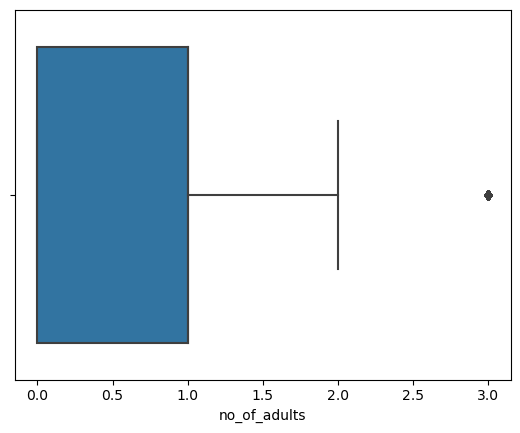

In [23]:
sns.boxplot(df.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

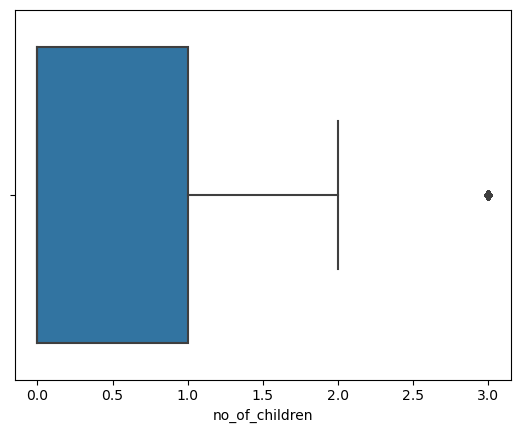

In [24]:
sns.boxplot(df.no_of_children)

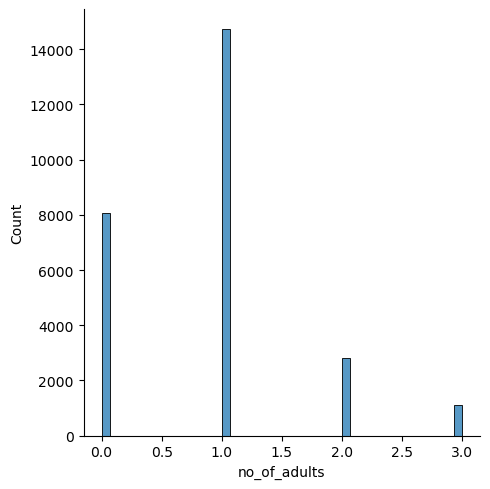

In [25]:
sns.displot(df.no_of_adults)

In [26]:
df. h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

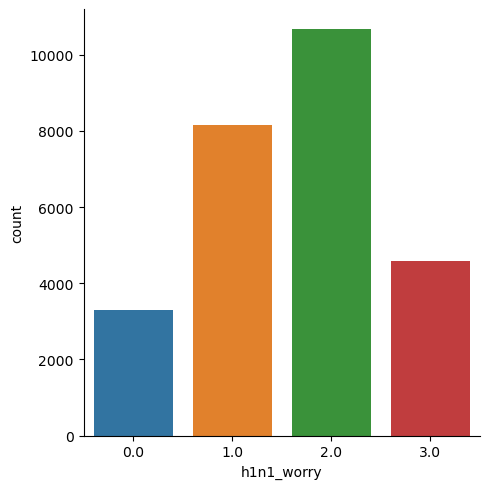

In [27]:
sns.factorplot('h1n1_worry', data = df, kind = "count")

In [28]:
df.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

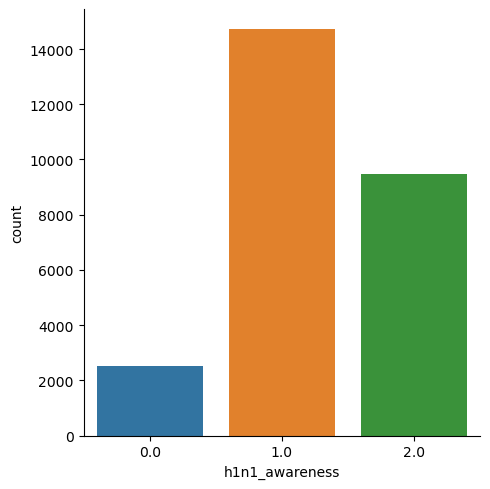

In [29]:
sns.factorplot('h1n1_awareness', data = df, kind = "count")

In [30]:
df.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

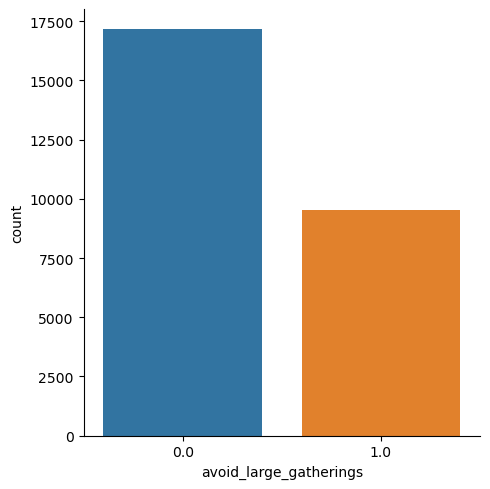

In [31]:
sns.factorplot('avoid_large_gatherings', data = df, kind = "count")

In [32]:
df.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

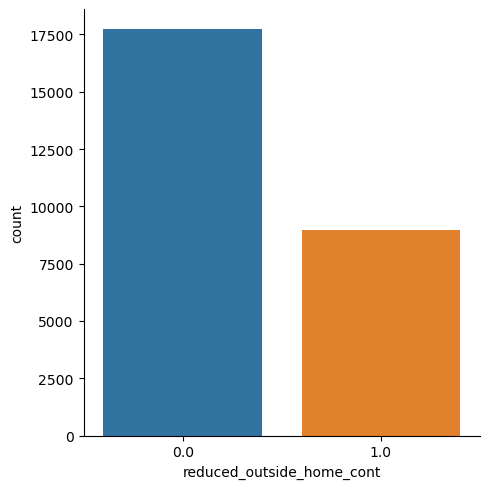

In [33]:
sns.factorplot('reduced_outside_home_cont', data = df, kind = "count")

In [34]:
df.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

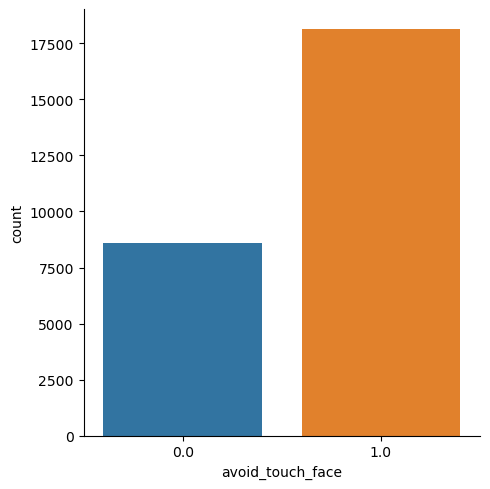

In [35]:
sns.factorplot('avoid_touch_face', data = df, kind = "count")

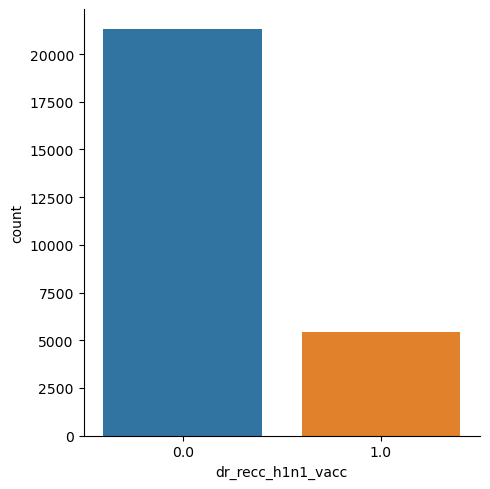

In [36]:
sns.factorplot('dr_recc_h1n1_vacc', data = df, kind = "count")

In [37]:
df.dr_recc_seasonal_vacc.value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

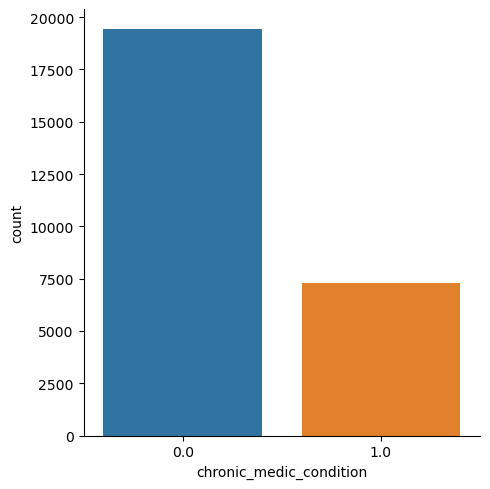

In [38]:
sns.factorplot('chronic_medic_condition', data = df, kind = "count")

In [39]:
df.has_health_insur.value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

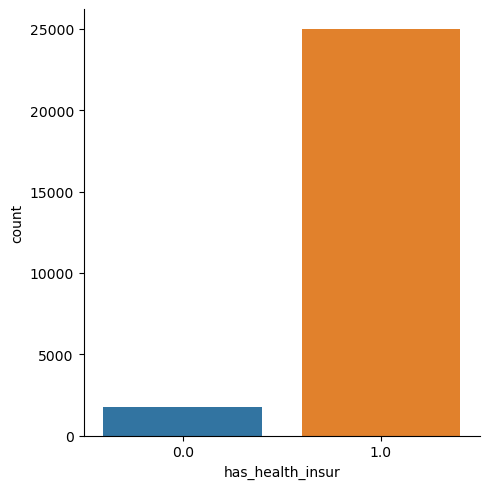

In [40]:
sns.factorplot('has_health_insur', data = df, kind = "count")

In [41]:
df.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

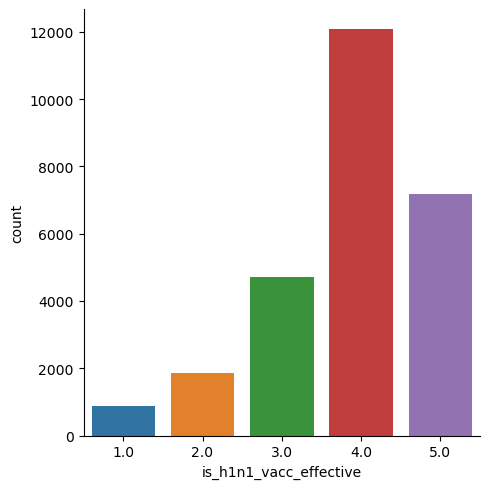

In [42]:
sns.factorplot('is_h1n1_vacc_effective', data = df, kind = "count")

In [43]:
df.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

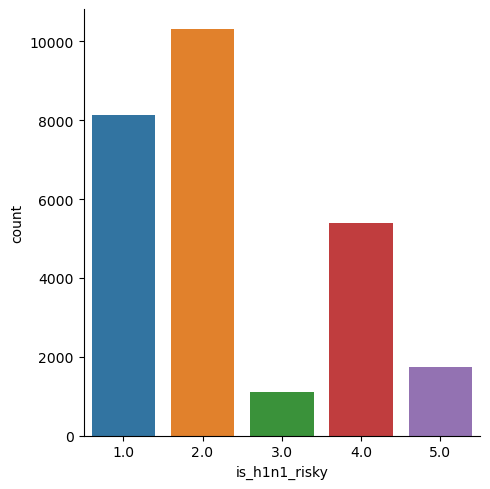

In [44]:
sns.factorplot('is_h1n1_risky', data = df, kind = "count")

In [45]:
df.sick_from_h1n1_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

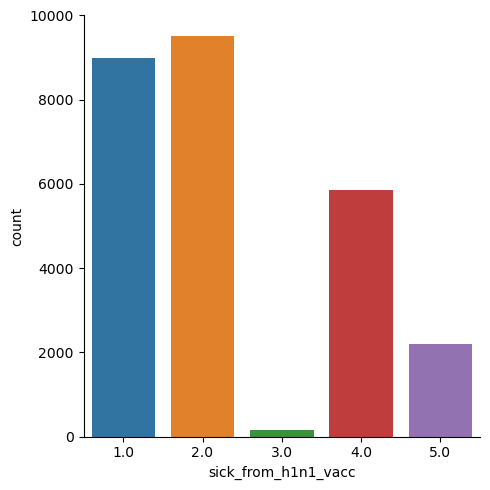

In [46]:
sns.factorplot('sick_from_h1n1_vacc', data = df, kind = "count")

In [47]:
df.is_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

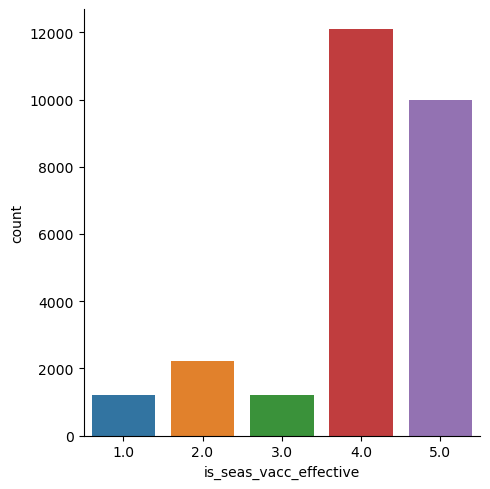

In [48]:
sns.factorplot('is_seas_vacc_effective', data = df, kind = "count")

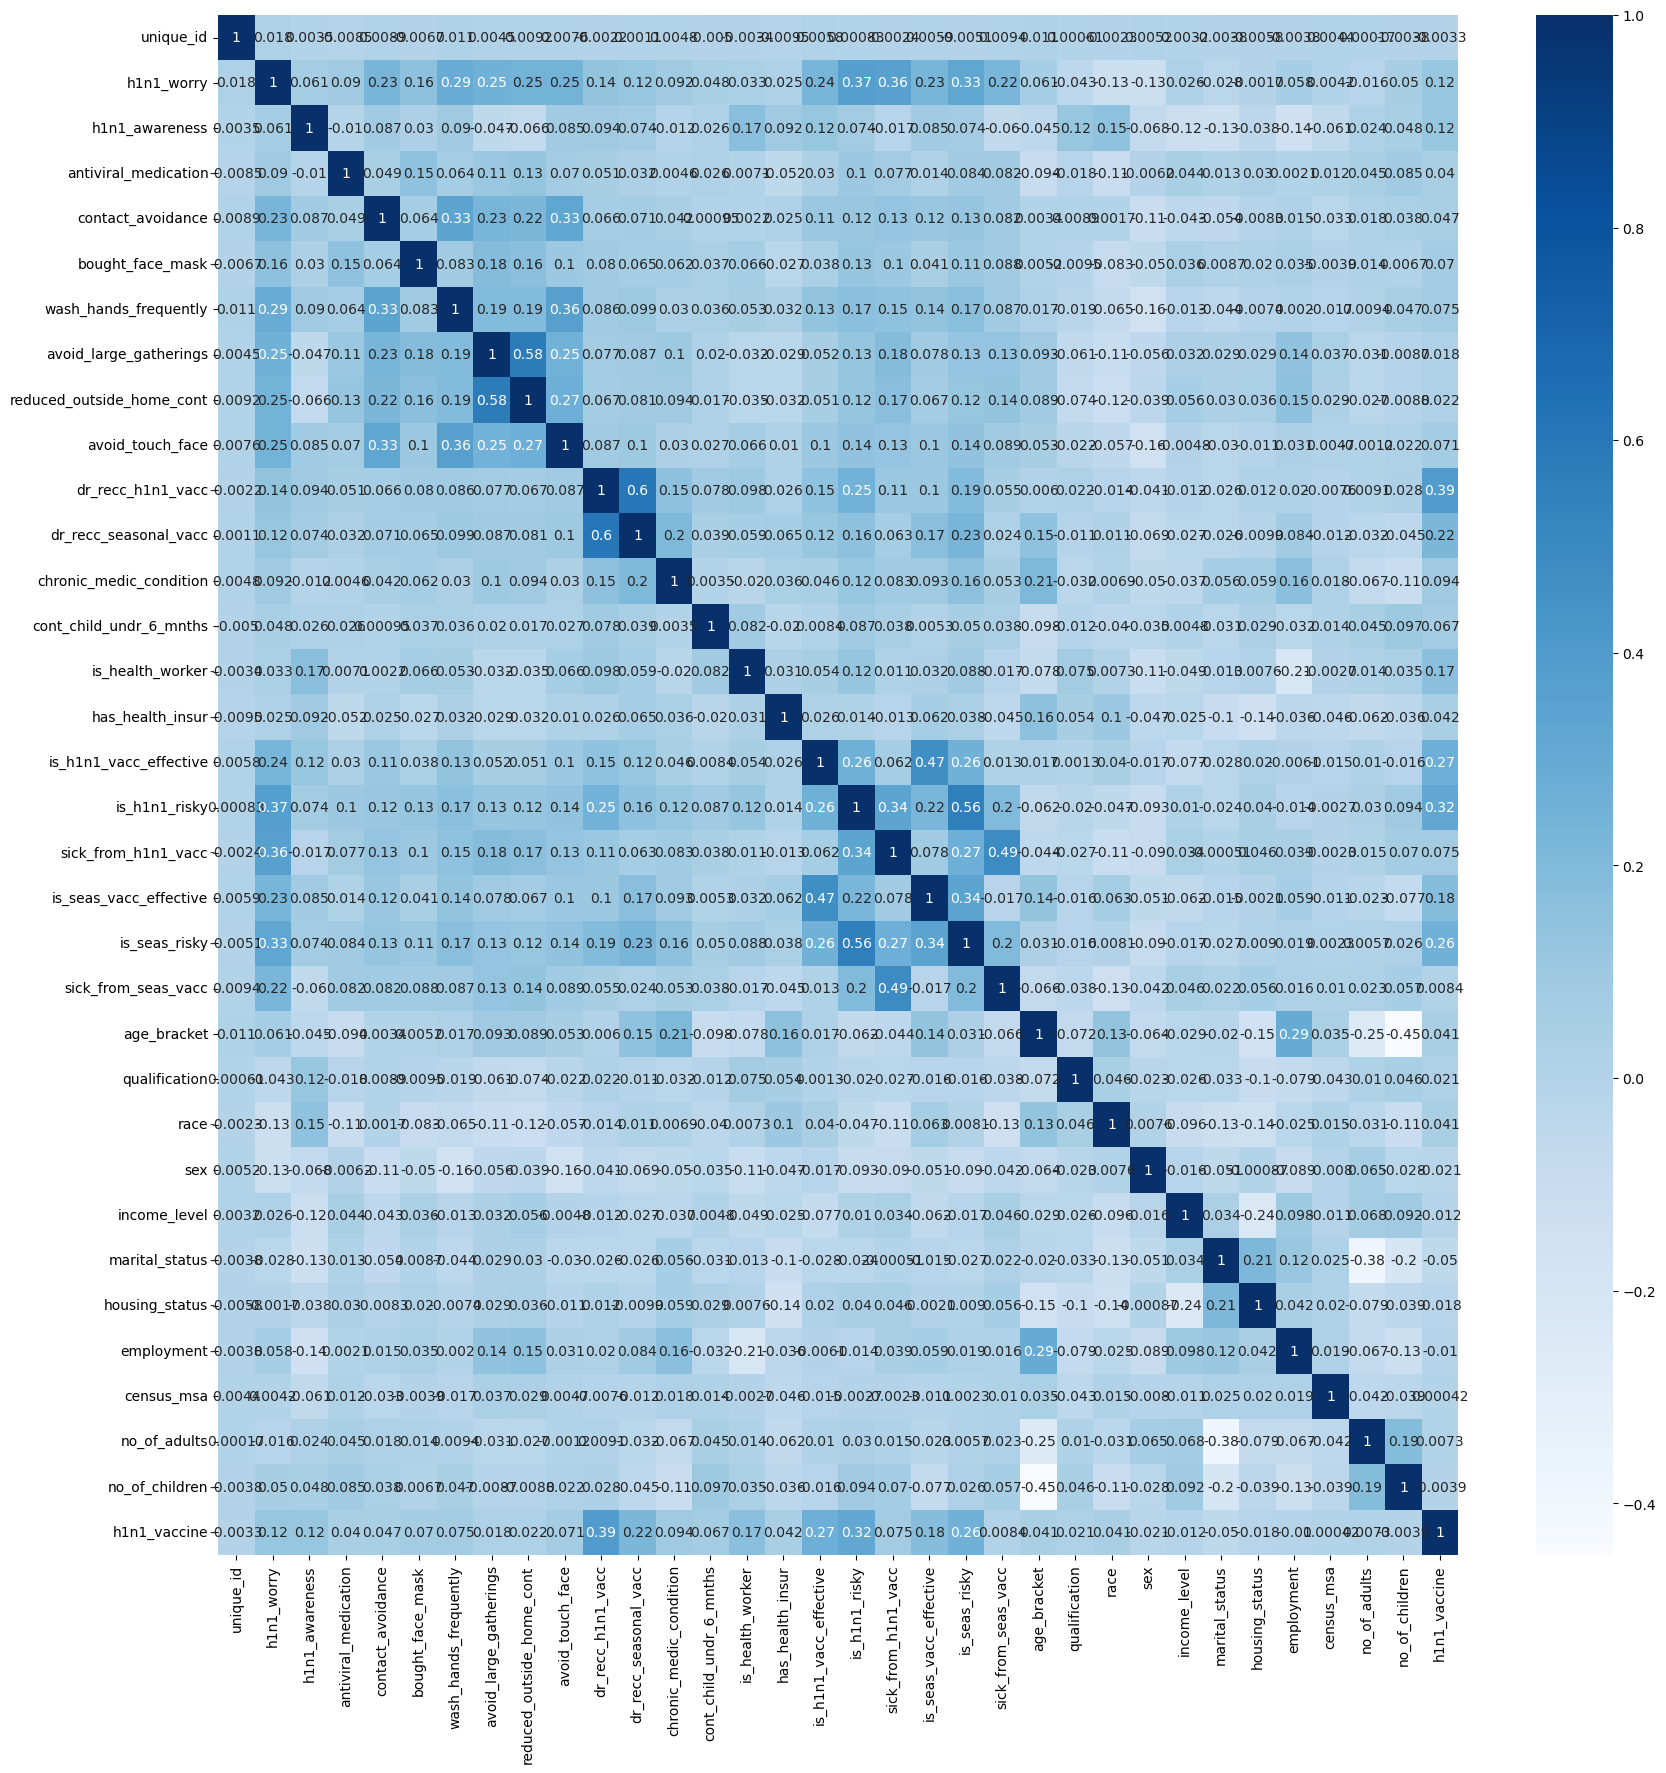

In [49]:
corrmat = df.corr()
top_corr_df = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_df].corr(),annot=True,cmap="Blues")

In [50]:
print("\nMean:->\n")
print("contact_avoidance: ",np.mean(df["contact_avoidance"]))
print("age_bracket: ",np.mean(df["age_bracket"]))
print("avoid_large_gatherings: ",np.mean(df["avoid_large_gatherings"]))

print("\nMode:->\n")
print("contact_avoidance: ",stats.mode(df["contact_avoidance"])[0])
print("age_bracket: ",stats.mode(df["age_bracket"])[0])
print("avoid_large_gatherings: ",stats.mode(df["avoid_large_gatherings"])[0])

print("\nMedian:->\n")
print("contact_avoidance: ",np.median(df["contact_avoidance"]))
print("age_bracket: ",np.median(df["age_bracket"]))
print("avoid_large_gatherings: ",np.median(df["avoid_large_gatherings"]))

print("\nStandard Deviation:->\n")
print("contact_avoidance: ",np.std(df["contact_avoidance"]))
print("age_bracket: ",np.std(df["age_bracket"]))
print("avoid_large_gatherings: ",np.std(df["avoid_large_gatherings"]))


Mean:->

contact_avoidance:  0.7277492792151871
age_bracket:  2.1861309768974424
avoid_large_gatherings:  0.3574718238664021

Mode:->

contact_avoidance:  [1.]
age_bracket:  [4]
avoid_large_gatherings:  [0.]

Median:->

contact_avoidance:  1.0
age_bracket:  2.0
avoid_large_gatherings:  0.0

Standard Deviation:->

contact_avoidance:  0.44511826048467157
age_bracket:  1.4572931270308522
avoid_large_gatherings:  0.4792553797381973


In [51]:
fig = px.histogram(df["contact_avoidance"],x ="contact_avoidance" ,y = "contact_avoidance" )
fig.update_layout(title="contact_avoidance")
fig.show()

fig = px.histogram(df["age_bracket"],x ="age_bracket" ,y = "age_bracket" )
fig.update_layout(title="age_bracket")
fig.show()

fig = px.histogram(df["avoid_large_gatherings"],x ="avoid_large_gatherings" ,y = "avoid_large_gatherings" )
fig.update_layout(title="avoid_large_gatherings")
fig.show()



In [52]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

   race  sex  income_level  marital_status  housing_status  employment  \
0     3    0             2               2               1           2   
1     3    1             2               2               2           0   
2     3    1             0               2               1           0   
3     3    0             2               2               2           2   
4     3    0             0               0               1           0   

   census_msa  no_of_adults  no_of_children  h1n1_vaccine  
0           2           0.0             0.0             0  
1           0           0.0             0.0             0  
2           0           2.0             0.0             0  
3           1           0.0             0.0             0  
4           0           1.0             0.0             0  

[5 rows x 34 columns]

In [53]:
df["sex"] = le.fit_transform(df["sex"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["qualification"] = le.fit_transform(df["qualification"])
df["employment"] = le.fit_transform(df["employment"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["race"] = le.fit_transform(df["race"])

#df = pd.get_dummies(df)
df.head(5)

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

   race  sex  income_level  marital_status  housing_status  employment  \
0     3    0             2               2               1           2   
1     3    1             2               2               2           0   
2     3    1             0               2               1           0   
3     3    0             2               2               2           2   
4     3    0             0               0               1           0   

   census_msa  no_of_adults  no_of_children  h1n1_vaccine  
0           2           0.0             0.0             0  
1           0           0.0             0.0             0  
2           0           2.0             0.0             0  
3           1           0.0             0.0             0  
4           0           1.0             0.0             0  

[5 rows x 34 columns]

In [54]:
X = df.drop(["h1n1_vaccine","unique_id"],axis=1)
y = df["h1n1_vaccine"]

Feature importance by XGBoost:->

h1n1_worry -> 0.017985178
h1n1_awareness -> 0.015655061
antiviral_medication -> 0.012819035
contact_avoidance -> 0.014235287
bought_face_mask -> 0.015808161
wash_hands_frequently -> 0.012359003
avoid_large_gatherings -> 0.014463459
reduced_outside_home_cont -> 0.014041258
avoid_touch_face -> 0.013788152
dr_recc_h1n1_vacc -> 0.41938388
dr_recc_seasonal_vacc -> 0.020891678
chronic_medic_condition -> 0.015462472
cont_child_undr_6_mnths -> 0.016247692
is_health_worker -> 0.040239688
has_health_insur -> 0.013275064
is_h1n1_vacc_effective -> 0.0574621
is_h1n1_risky -> 0.04955785
sick_from_h1n1_vacc -> 0.016972497
is_seas_vacc_effective -> 0.0155897215
is_seas_risky -> 0.020642543
sick_from_seas_vacc -> 0.016918413
age_bracket -> 0.01775938
qualification -> 0.015386276
race -> 0.016867297
sex -> 0.015016761
income_level -> 0.015777016
marital_status -> 0.016006455
housing_status -> 0.013735336
employment -> 0.013887889
census_msa -> 0.013464533
no_of_adults -

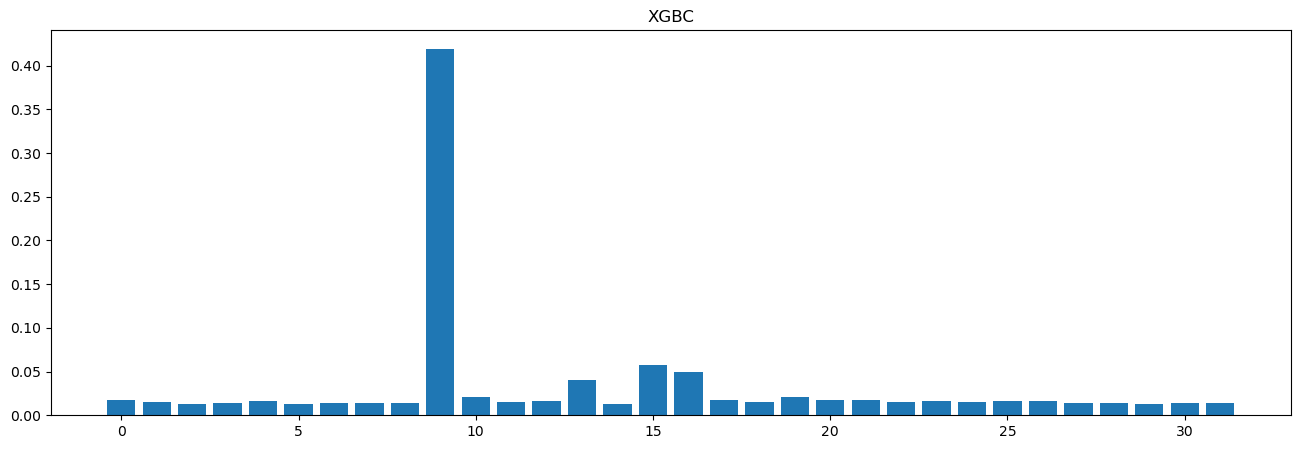

Feature importance by Random Forest:->

h1n1_worry -> 0.040203095005657004
h1n1_awareness -> 0.028492881950605967
antiviral_medication -> 0.00803968339492403
contact_avoidance -> 0.01835999152570892
bought_face_mask -> 0.010104278032463205
wash_hands_frequently -> 0.012369866447649874
avoid_large_gatherings -> 0.019207888740458538
reduced_outside_home_cont -> 0.018943567089586156
avoid_touch_face -> 0.01842880315740691
dr_recc_h1n1_vacc -> 0.1052169165942976
dr_recc_seasonal_vacc -> 0.022789138121881977
chronic_medic_condition -> 0.018614096918878303
cont_child_undr_6_mnths -> 0.01154749400284773
is_health_worker -> 0.021915125638954005
has_health_insur -> 0.006371959995651759
is_h1n1_vacc_effective -> 0.06574484935095151
is_h1n1_risky -> 0.07408664383349073
sick_from_h1n1_vacc -> 0.04076764764132866
is_seas_vacc_effective -> 0.03479261756004201
is_seas_risky -> 0.049639474206377356
sick_from_seas_vacc -> 0.038339501517412916
age_bracket -> 0.048491249369226004
qualification -> 0.03969

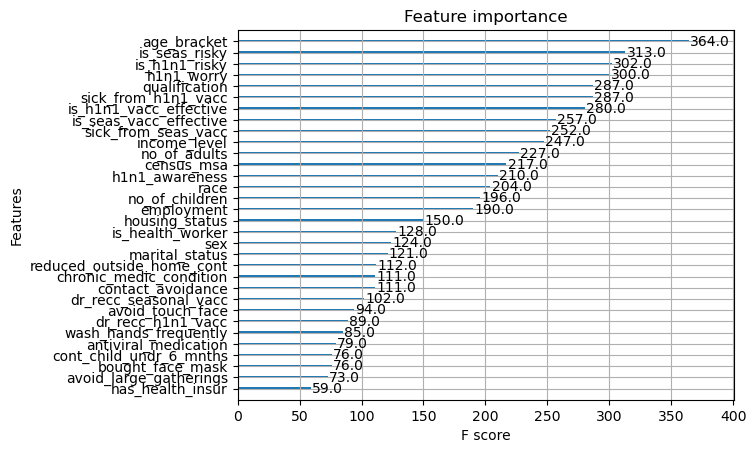

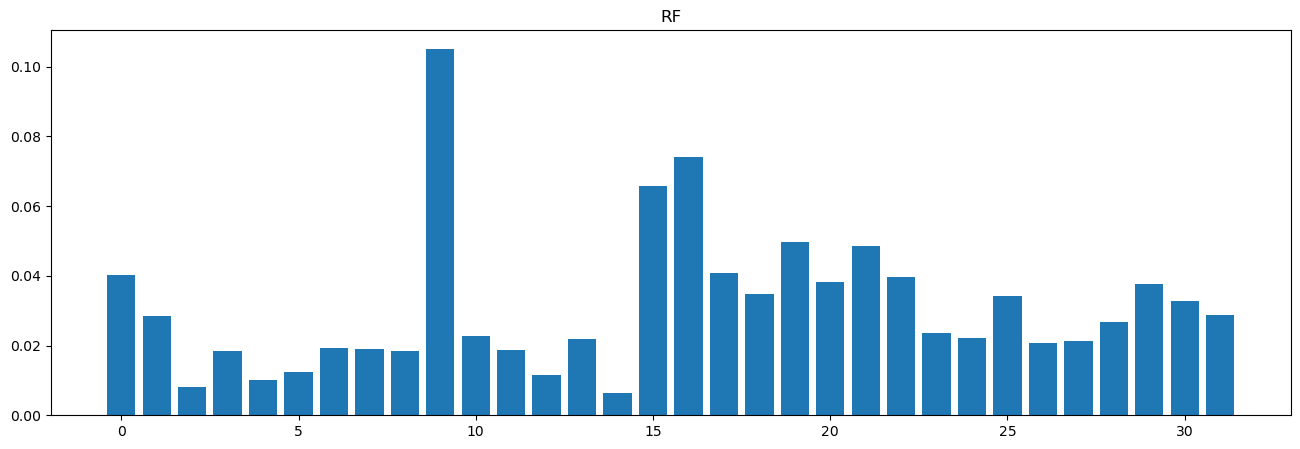

Feature importance by Decision Tree:->

h1n1_worry -> 0.037695385494568044
h1n1_awareness -> 0.031040103840077552
antiviral_medication -> 0.0067737550232821455
contact_avoidance -> 0.01822462494024918
bought_face_mask -> 0.00851200559009819
wash_hands_frequently -> 0.012120476768344013
avoid_large_gatherings -> 0.01800736334955694
reduced_outside_home_cont -> 0.020629232827181133
avoid_touch_face -> 0.01832394051803913
dr_recc_h1n1_vacc -> 0.15533830685577538
dr_recc_seasonal_vacc -> 0.016845453916695723
chronic_medic_condition -> 0.018834533802492424
cont_child_undr_6_mnths -> 0.01205563914445336
is_health_worker -> 0.02018219984423352
has_health_insur -> 0.006764106538157984
is_h1n1_vacc_effective -> 0.05766349324947275
is_h1n1_risky -> 0.05645614266446857
sick_from_h1n1_vacc -> 0.03576667207166135
is_seas_vacc_effective -> 0.028590290055319056
is_seas_risky -> 0.037196312904090846
sick_from_seas_vacc -> 0.038213914611424434
age_bracket -> 0.05066191943527151
qualification -> 0.04379

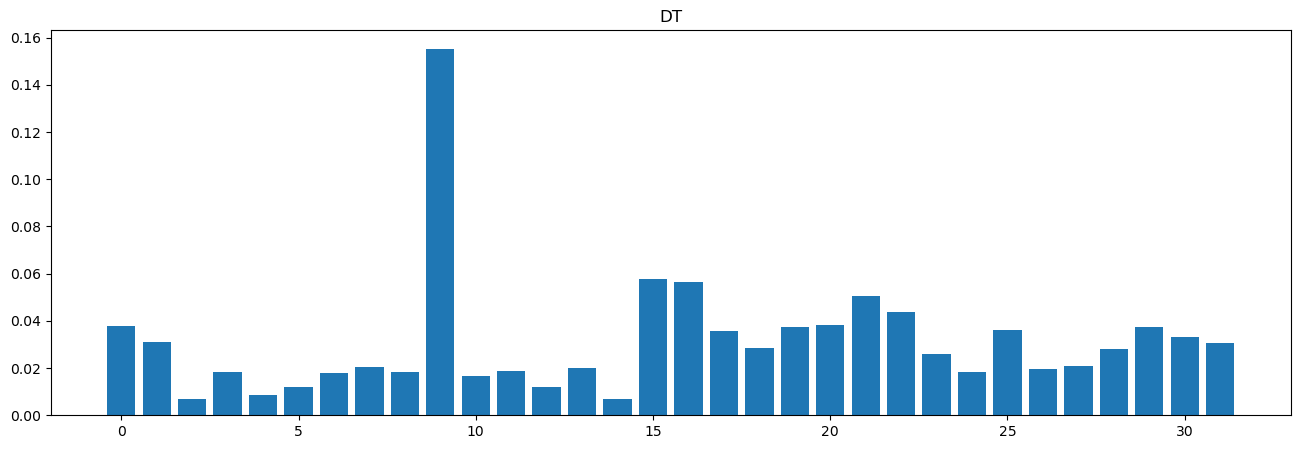

Feature importance by Suppoprt Vector Machine:->

h1n1_worry -> -0.08403939572053787
h1n1_awareness -> 0.06743997771565091
antiviral_medication -> 0.07336148355017258
contact_avoidance -> -0.02412964042838439
bought_face_mask -> 0.1161836421121194
wash_hands_frequently -> -0.004927600110875119
avoid_large_gatherings -> -0.0956290217771425
reduced_outside_home_cont -> -0.03177001421732939
avoid_touch_face -> 0.015608403022667972
dr_recc_h1n1_vacc -> 1.5326097305517692
dr_recc_seasonal_vacc -> -0.20932319394950127
chronic_medic_condition -> 0.05266933538058538
cont_child_undr_6_mnths -> 0.1398502855308834
is_health_worker -> 0.4046391359079564
has_health_insur -> 0.032126398876300755
is_h1n1_vacc_effective -> 0.3339345164399674
is_h1n1_risky -> 0.18820259587448618
sick_from_h1n1_vacc -> -0.009011546645183444
is_seas_vacc_effective -> 0.05918170749669116
is_seas_risky -> 0.0683356628180718
sick_from_seas_vacc -> -0.0345769183433049
age_bracket -> 0.05820684633010842
qualification -> 0.005

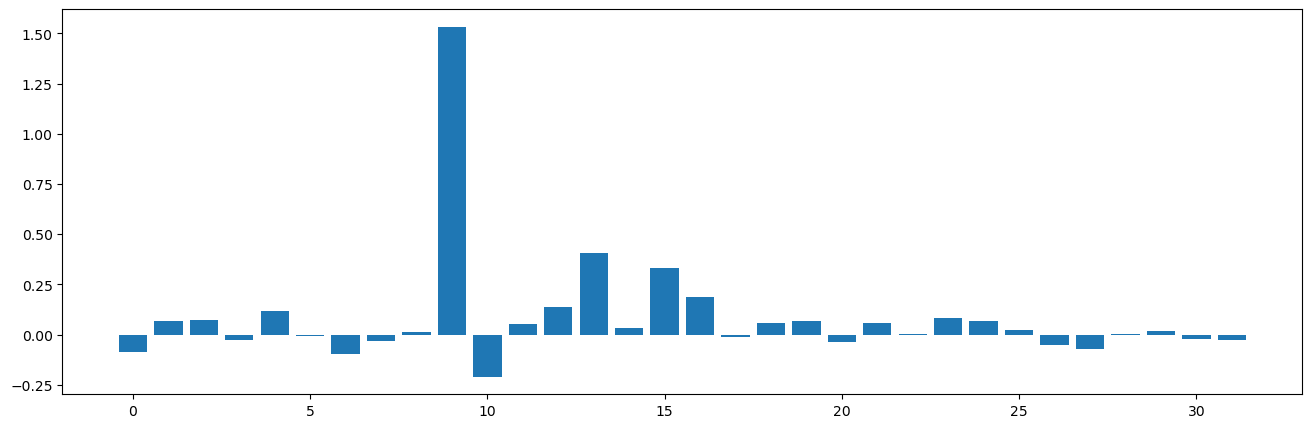

Feature importance by Logistic Regression:->

h1n1_worry -> -0.11270428351505571
h1n1_awareness -> 0.15618894754615997
antiviral_medication -> 0.18532656336262562
contact_avoidance -> -0.027756137706882393
bought_face_mask -> 0.1893861233808618
wash_hands_frequently -> 0.025987334950665356
avoid_large_gatherings -> -0.21323672818545497
reduced_outside_home_cont -> -0.04881242100091726
avoid_touch_face -> 0.04010969737466411
dr_recc_h1n1_vacc -> 2.0089478224432518
dr_recc_seasonal_vacc -> -0.46169964458587803
chronic_medic_condition -> 0.07436247058335388
cont_child_undr_6_mnths -> 0.24959538332158718
is_health_worker -> 0.8198621728322286
has_health_insur -> 0.18639258354824617
is_h1n1_vacc_effective -> 0.624186886964649
is_h1n1_risky -> 0.3607547882426497
sick_from_h1n1_vacc -> -0.008692429662104869
is_seas_vacc_effective -> 0.08587529330303297
is_seas_risky -> 0.15652790509982564
sick_from_seas_vacc -> -0.07685862348007845
age_bracket -> 0.11007453318287103
qualification -> 0.0144390

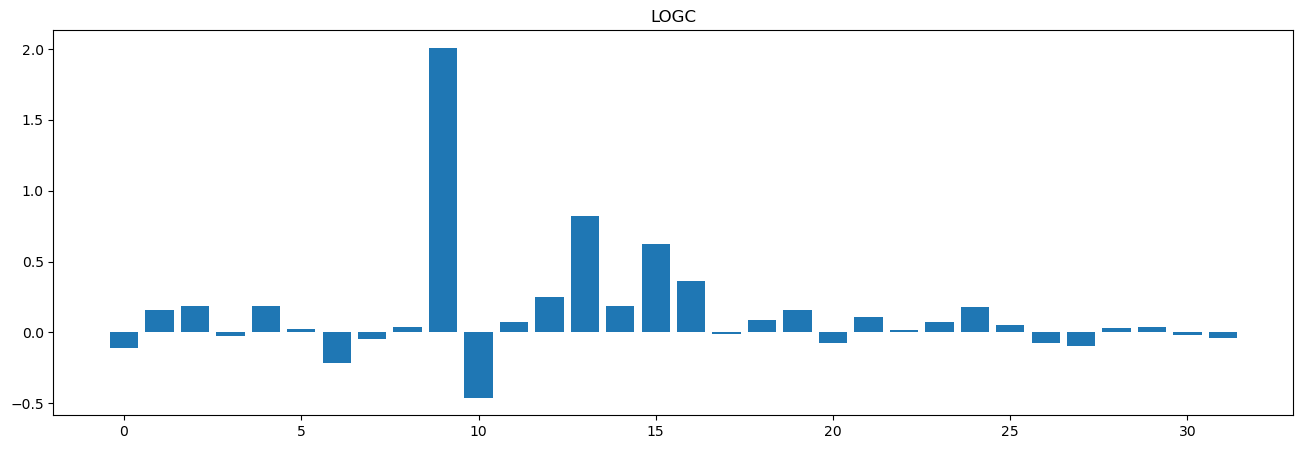

In [55]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

In [56]:
A = list(df.h1n1_vaccine).count(1)
B = list(df.h1n1_vaccine).count(0)
print("Count of 1<vaccinated>: ",A,"\nCount of 0<not vaccinated>: ",B)

fig = px.bar((A,B),x=["vaccinated","not vaccinated"],y=[A,B],color=[A,B])
fig.show()

Count of 1<vaccinated>:  5674 
Count of 0<not vaccinated>:  21033


In [57]:
new_data = df.copy()


df_majority = new_data[new_data.h1n1_vaccine==1]
df_minority = new_data[new_data.h1n1_vaccine==0]



df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.h1n1_vaccine.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.h1n1_vaccine.value_counts())

Downsampled data:->
 0    21033
1      192
Name: h1n1_vaccine, dtype: int64
Upsampled data:->
 1    5674
0     422
Name: h1n1_vaccine, dtype: int64


### Prediction using Accuracy

In [62]:
X = new_data.drop(["h1n1_vaccine","unique_id"],axis=1)
y = new_data["h1n1_vaccine"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred_VE = ensemble.predict(X_test) 
print(classification_report(y_pred_VE,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred_VE,y_test))
VE=accuracy_score(y_pred_VE,y_test)


SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred_SV = SVM.predict(X_test)
print(classification_report(y_pred_SV,y_test))
print("SVM:>",accuracy_score(y_pred_SV,y_test))
SV=accuracy_score(y_pred_SV,y_test)

XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred_XGB = XGBC.predict(X_test)
print(classification_report(y_pred_XGB,y_test))
print("XGBoost:>",accuracy_score(y_pred_XGB,y_test))
XGB=accuracy_score(y_pred_XGB,y_test)

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred_RF= Model1.predict(X_test)
print(classification_report(y_pred_RF,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred_RF,y_test))
RF=accuracy_score(y_pred_RF,y_test)

Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred_GB = Model2.predict(X_test)
print(classification_report(y_pred_GB,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred_GB,y_test))
GB=accuracy_score(y_pred_GB,y_test)

Model3 = DecisionTreeClassifier()
Model3.fit(X_train,y_train)
y_pred_DTC = Model3.predict(X_test)
print(classification_report(y_pred_DTC,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred_DTC,y_test))
DTC=accuracy_score(y_pred_DTC,y_test)

Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred_ABC = Model4.predict(X_test)
print(classification_report(y_pred_ABC,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred_ABC,y_test))
ABC=accuracy_score(y_pred_ABC,y_test)

Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred_LDA = Model5.predict(X_test)
print(classification_report(y_pred_LDA,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred_LDA,y_test),"\n")
LDA=accuracy_score(y_pred_LDA,y_test)

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
print(classification_report(y_pred_KNN,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred_KNN,y_test))
KNN=accuracy_score(y_pred,y_test)

Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred_GNB = Model7.predict(X_test)
print(classification_report(y_pred_GNB,y_test))
print("GaussianNB:>",accuracy_score(y_pred_GNB,y_test))
GNB=accuracy_score(y_pred_GNB,y_test)

Model8 = LogisticRegression()
Model8.fit(X_train,y_train)
y_pred_LR = Model8.predict(X_test)
print(classification_report(y_pred_LR,y_test))
print("Logistic Regression:>",accuracy_score(y_pred_LR,y_test))
LR=accuracy_score(y_pred_LR,y_test)

Counter:  Counter({0: 21033, 1: 5674})
After Standardization
Mean  -2.9155132848369065e-17 Standard Deviation  0.9999999999999999 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5807
           1       0.42      0.69      0.52       870

    accuracy                           0.83      6677
   macro avg       0.68      0.77      0.71      6677
weighted avg       0.88      0.83      0.85      6677

Voting Ensemble:> 0.8336079077429983
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4706
           1       0.69      0.51      0.59      1971

    accuracy                           0.79      6677
   macro avg       0.75      0.71      0.72      6677
weighted avg       0.78      0.79      0.78      6677

SVM:> 0.7879287104987269
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      5528
           1       0.45      0.56      0.50

In [63]:
Accuracy_Score = [XGB,RF,GB,DTC,ABC,LDA,KNN,GNB,LR]
Models = [ 'XGBoost', 'Random Forest','Gradient Boosting', 'Decision Tree Classifier', 'AdaBoost Classifier', 
          'Linear Discriminant Analysis','KNeighbors Classifier','Gaussian Naive Bayes','Logistic Regression']

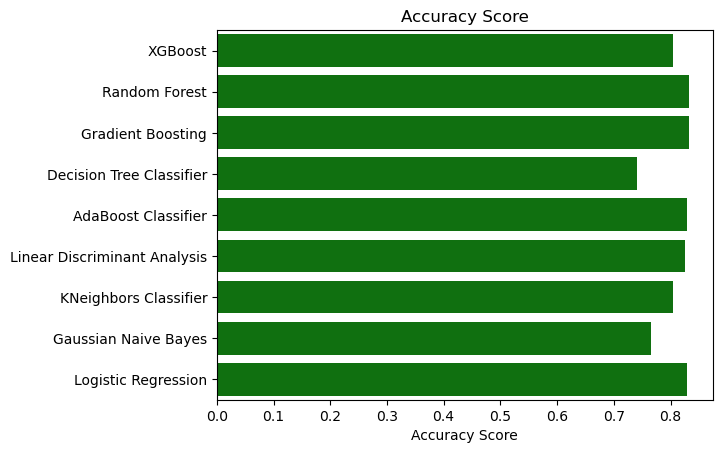

In [69]:
sns.barplot(Accuracy_Score, Models, color="green")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()